<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/Recommended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Recommend.csv",names=['user_id', 'movie_id', 'rating','timestamp'])
df

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
df.shape

(100000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
df.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


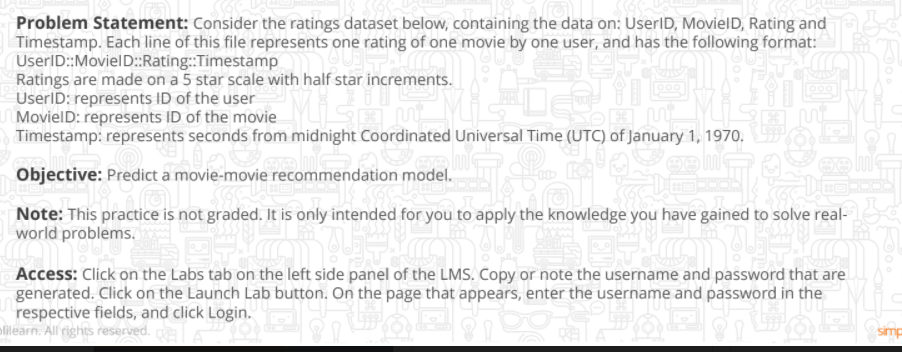

##Building collaborative filtering model from scratch


Create a train test split of 75/25 by declaring number of users and movies

In [ ]:
n_users = df.user_id.unique().shape[0]
n_movies = df.movie_id.unique().shape[0]
train_data, test_data = train_test_split(df, test_size=0.25)

Populate the train matrix (user_id x movie_id) with ratings such that

[user_id index, movie_id index] = given rating

In [ ]:
train_data_matrix = np.zeros((n_users, n_movies))
for line in train_data.itertuples():
#[user_id index, movie_id index] = given rating.
      train_data_matrix[line[1]-1, line[2]-1] = line[3]
train_data_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Populate the test matrix (user_id x movie_id) with ratings such that

[user_id index, movie_id index] = given rating

In [ ]:
test_data_matrix = np.zeros((n_users, n_movies))
for line in test_data.itertuples():

#[user_id index, movie_id index] = given rating.
     test_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix

array([[0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Create cosine similarity matrices for movies and predict a movie-movie

recommendation model

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
movie_similarity = pairwise_distances(train_data_matrix.T,metric='cosine')
movie_pred = train_data_matrix.dot(movie_similarity) / np.array([np.abs(movie_similarity).sum(axis=1)])
print(movie_pred)

[[0.37418996 0.3851048  0.3971355  ... 0.44766274 0.43823272 0.43224212]
 [0.07819409 0.09149871 0.08883366 ... 0.09319956 0.09470353 0.09427591]
 [0.06488098 0.06839588 0.06689788 ... 0.06484425 0.06804112 0.06849625]
 ...
 [0.02777934 0.03593558 0.03390801 ... 0.0400197  0.03964221 0.0390075 ]
 [0.12577575 0.13182868 0.14134058 ... 0.1487165  0.14624883 0.14832434]
 [0.19513426 0.1926275  0.20731505 ... 0.23983559 0.23188289 0.23302859]]
